In [2]:
# IMPORTING IMP LIBRARIES
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import wordcloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score
from nltk.sentiment import SentimentIntensityAnalyzer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# LOADING DATASET
file='/content/blogs.csv'

df = pd.read_csv(file,encoding='latin')

In [4]:
df #CHECKING DATSET

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [5]:
df.shape #  2000rows and 2 columns.

(2000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
df['Labels'].value_counts()  # Checking unique values in labels
# 20 unique categories of sentiments in label column.

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


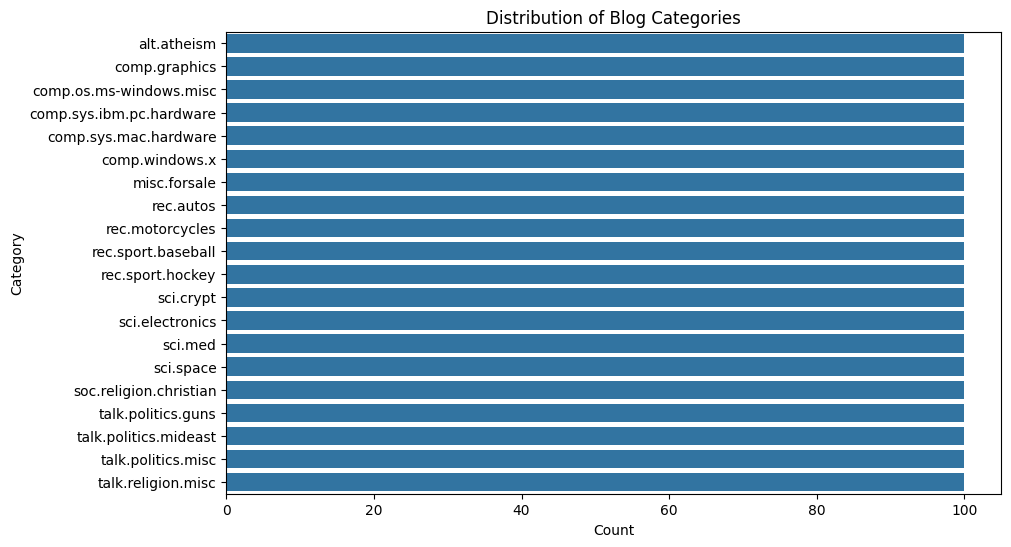

In [8]:
# Plot the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index)
plt.title('Distribution of Blog Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [10]:
# Preprocessing the data
def preprocess_text(text):
  # Removing punctuation
  text = text.translate(str.maketrans('', '',string.punctuation))
  # Converting to lowercase
  text = text.lower()
  # Tokenize and removing stopwords
  tokens = text.split()
  tokens=[word for word in tokens if word not in stopwords.words('english')]
  return ' '.join(tokens)


In [11]:
# Applying processing function to the data column
df['cleaned_data']=df['Data'].apply(preprocess_text)

In [12]:
df.head()  # Stored clean data in a new column

,Data,Labels,cleaned_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [13]:
# Performing fature extraction
vectorizer =TfidfVectorizer(max_features=5000)
# Splitting the data into x and y
x=vectorizer.fit_transform(df['cleaned_data']).toarray()
y=df['Labels']

In [14]:
# Spitting data into testing and training dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
# Applying naive bayes model for text Classification.
nb=MultinomialNB()
# Training model
nb.fit(x_train,y_train)

MultinomialNB()

In [16]:
y_pred=nb.predict(x_test)

In [17]:
# Performing evaluation
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.59      0.62      0.61        16
                 sci.med       0.88      0.88      0.88        17
         

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [19]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8225
Precision: 0.8281299559144919
Recall: 0.8225
F1 Score: 0.8174927019571058

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics  

In [20]:
# SENTIMENT ANALYSIS
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [21]:
senti=SentimentIntensityAnalyzer()  # Intializing sentiment intensity analyzer

In [22]:
# User define function for sentiment anaylysis.
def get_sentiment(text):
  scores=senti.polarity_scores(text)
  if scores['compound']>=0.05:
    return 'positive'
  elif scores['compound']<=-0.05:
    return 'negative'
  else:
    return 'neutral'

In [23]:
# Applying function to cleaned_data
df['Sentiment']=df['cleaned_data'].apply(get_sentiment)

In [24]:
 # Examine the distribution of sentiments across different categories
sentiment_category = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_category)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.40     0.01      0.59
comp.graphics                 0.10     0.03      0.87
comp.os.ms-windows.misc       0.22     0.02      0.76
comp.sys.ibm.pc.hardware      0.18     0.03      0.79
comp.sys.mac.hardware         0.17     0.04      0.79
comp.windows.x                0.21     0.02      0.77
misc.forsale                  0.08     0.10      0.82
rec.autos                     0.26     0.03      0.71
rec.motorcycles               0.32     0.01      0.67
rec.sport.baseball            0.25     0.03      0.72
rec.sport.hockey              0.28     0.03      0.69
sci.crypt                     0.22     0.02      0.76
sci.electronics               0.13     0.06      0.81
sci.med                       0.29     0.02      0.69
sci.space                     0.28     0.05      0.67
soc.religion.christian        0.28     0.01      0.71
talk.politics.guns          

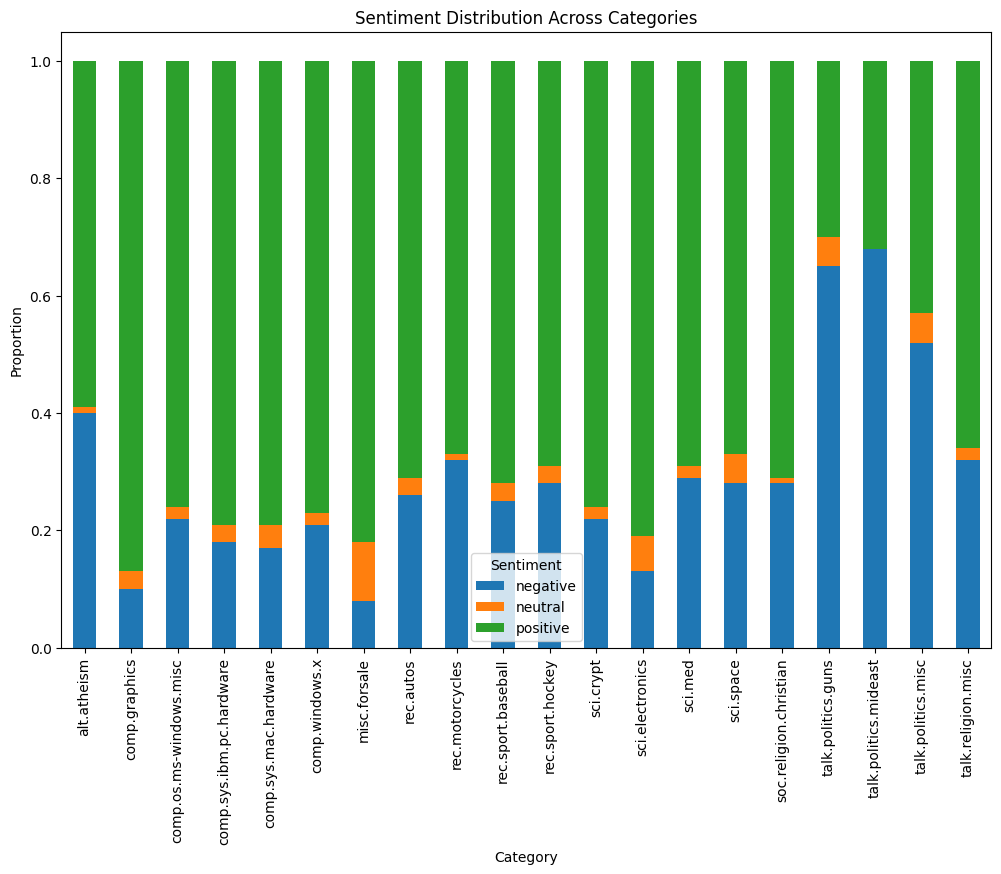

In [25]:
# Plot the sentiment distribution across categories
sentiment_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.show()

In [26]:
# Summarize the evaluation results
print(f'Naive Bayes Classifier Performance:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Naive Bayes Classifier Performance:
Accuracy: 0.8225
Precision: 0.8281
Recall: 0.8225
F1 Score: 0.8175

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.e

In [27]:
# The sentiment analysis results
print('\nSentiment Analysis Results:')
print(sentiment_category)


Sentiment Analysis Results:
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.40     0.01      0.59
comp.graphics                 0.10     0.03      0.87
comp.os.ms-windows.misc       0.22     0.02      0.76
comp.sys.ibm.pc.hardware      0.18     0.03      0.79
comp.sys.mac.hardware         0.17     0.04      0.79
comp.windows.x                0.21     0.02      0.77
misc.forsale                  0.08     0.10      0.82
rec.autos                     0.26     0.03      0.71
rec.motorcycles               0.32     0.01      0.67
rec.sport.baseball            0.25     0.03      0.72
rec.sport.hockey              0.28     0.03      0.69
sci.crypt                     0.22     0.02      0.76
sci.electronics               0.13     0.06      0.81
sci.med                       0.29     0.02      0.69
sci.space                     0.28     0.05      0.67
soc.religion.christian        0.28     0.01      0.71

In [ ]:
## Done